# Desafío - Random Forest

* Integrantes:
    * Hugo Contreras
    * César Flores
    * Rodrigo Campos
    * Esteban Ramírez

### Ejercicio 1: Preparación del ambiente de trabajo

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('ames_housing.csv').drop(columns = 'Unnamed: 0')
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


### Ejercicio 2: Importación de archivos serializados

__Cargar Modelo Compañero__

In [79]:
modelo_companero = open('Hugo_Contreras_modelo.pickle','rb')

In [80]:
modelo_hugo = pickle.load(modelo_companero)

__Abrir Modelo Propio__

In [81]:
modelo = open('CesarFlores_model.sav','rb')
x_train = open('CesarFlores-x_train.sav','rb')
x_test = open('CesarFlores-x_test.sav','rb')
y_train = open('CesarFlores-y_train.sav','rb')
y_test = open('CesarFlores-y_test.sav','rb')

__Cargar Modelo Propio__

In [82]:
model_load = pickle.load(modelo)
x_test_load = pickle.load(x_test)
y_test_load = pickle.load(y_test)
x_train_load = pickle.load(x_train)
y_train_load = pickle.load(y_train)

__Predicción Modelo Propio__

In [83]:
predict = model_load.predict(x_test_load)

__Predicción Modelo Hugo__

In [84]:
predict2 = modelo_hugo.predict(x_test_load)

__Metricas de desempeño Modelo Propio__

In [85]:
r2 = r2_score(y_test_load,predict)
mse = mean_squared_error(y_test_load,predict)
mae = median_absolute_error(y_test_load,predict)

In [86]:
print('R2:', round(r2,3))
print('MSE:',round(mse,3))
print('MAE',round(mae,3))

R2: 0.785
MSE: 1424620805.406
MAE 17048.237


__Metricas de desempeño Modelo Compañero__

In [87]:
r2_ = r2_score(y_test_load,predict2)
mse_ = mean_squared_error(y_test_load,predict2)
mae_ = median_absolute_error(y_test_load,predict2)

In [88]:
print('R2:', round(r2_,3))
print('MSE:',round(mse_,3))
print('MAE',round(mae_,3))

R2: 0.407
MSE: 3926683921.735
MAE 25705.0


* Como se puede observar, al importar el modelo entrenado por mi compañero y el modelo entrenado propio, se obtienen mejores métricas de desempeño para el modelo propio.

* Esto nos demuestra que al entrenar árboles de decisión, estos tienen un alto sobreajuste a los datos de validación. Por lo que es siempre mejor utilizar random forest para evitar el soreajuste del modelo.

### Ejercicio 3: Evaluación Random Forest

__Instanciación del modelo__

In [112]:
modelo_rf = RandomForestRegressor(oob_score=True,random_state=18417).fit(x_train_load, y_train_load)

__Predicción__

In [113]:
predicted3 = modelo_rf.predict(x_test_load)

__Métricas de Desempeño__

In [114]:
r2_rf = r2_score(y_test_load,predicted3)
mse_rf = mean_squared_error(y_test_load,predicted3)
mae_rf = median_absolute_error(y_test_load,predicted3)

In [115]:
print('R2:', round(r2_rf,3))
print('MSE:',round(mse_rf,3))
print('MAE',round(mae_rf,3))

R2: 0.869
MSE: 865227823.27
MAE 12755.0


* Al entrenar el modelo random forest para el modelo de árbol de decisión propio, se obtiene una mejora en las métricas de desempeño, tanto en el aumento del r2, y la disminución del MSE y del MAE, respecto del modelo anterior.

* Como observamos en el primer random forest implementado, no se modificaron los hiperparámetros para el ajuste del modelo, y sin embargo, el modelo es mejor, por lo que se analizarán hiperparámetros para generar un mejor ajuste.

### Ejercicio 4: Generar modelo con los hiperparámetros

__Hiperparámetros__

In [109]:
max_features= [None,'log2' , 'sqrt']
n_estimators = np.arange(20,1000,50)

In [110]:
from sklearn.model_selection import GridSearchCV

__Instanciación del modelo__

In [116]:
modelo_rf2 = RandomForestRegressor(oob_score=True,random_state=18417)

In [119]:
grilla = GridSearchCV(modelo_rf2, param_grid={'max_features': max_features, 'n_estimators' :n_estimators}, n_jobs=-1)

__Entrenamiento__

In [121]:
grilla.fit(x_train_load,y_train_load)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=18417,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [None, 'log2

In [151]:
tmp_oob_none, tmp_oob_sqrt,tmp_oob_log2 = [], [], []
tmp_test_acc_none, tmp_test_acc_sqrt, tmp_test_acc_log = [], [], []
from sklearn.metrics import accuracy_score

for i in n_estimators:
    voting_rf_none = RandomForestRegressor(n_estimators= i,max_features=None, oob_score=True, random_state=18417).fit(x_train_load, y_train_load)
    voting_rf_sqrt = RandomForestRegressor(n_estimators= i,max_features="sqrt", warm_start=True,oob_score=True,random_state=123).fit(x_train_load, y_train_load)
    voting_rf_log = RandomForestRegressor(n_estimators= i, max_features="log2", warm_start=True, oob_score=True, random_state=123).fit(x_train_load, y_train_load)
    tmp_oob_none.append(1 - voting_rf_none.oob_score_)
    tmp_oob_sqrt.append(1 - voting_rf_sqrt.oob_score_)
    tmp_oob_log2.append(1 - voting_rf_log.oob_score_)
    tmp_test_acc_none.append(1 - r2_score(y_test_load, voting_rf_none.predict(x_test_load)))
    tmp_test_acc_sqrt.append(1 - r2_score(y_test_load, voting_rf_sqrt.predict(x_test_load)))
    tmp_test_acc_log.append(1 - r2_score(y_test_load, voting_rf_log.predict(x_test_load)))


<Figure size 864x288 with 0 Axes>

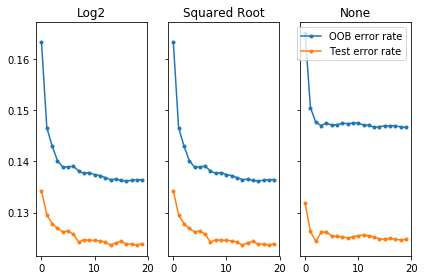

In [152]:
plt.figure(figsize=(12, 4));
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].plot(tmp_test_acc_log, '.-', label='Test error rate');
axs[0].set_title('Log2');
axs[1].plot(tmp_oob_sqrt,'.-', label='OOB error rate');
axs[1].plot(tmp_test_acc_sqrt,'.-', label='Test error rate');
axs[1].set_title('Squared Root');
axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].plot(tmp_test_acc_none,'.-', label='Test error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

* Como se puede observar en el gráfico, la mejor cantidad de atributos se tiene cuando el método es 'log2' ya que disminuyen los errores de predicción

__Best Parameters__

In [124]:
grilla.best_params_

{'max_features': 'log2', 'n_estimators': 670}

* Los mejores parámetros para el desempeño del modelo son una cantidad máxima de atributos de 'log2' y una cantidad de estimadores de 670.

### Ejercicio 5: Refactorice el modelo

__Entrenamiento con los mejores parámetros__

In [125]:
mejor_modelo = RandomForestRegressor(oob_score=True,random_state=18417, max_features = 'log2', n_estimators = 670).fit(x_train_load,y_train_load)

__Predicción__

In [127]:
prediccion_mejor_modelo = mejor_modelo.predict(x_test_load)

__Métricas de Desempeño__

In [129]:
r2_mejor_modelo = r2_score(y_test_load,prediccion_mejor_modelo)
mse_mejor_modelo = mean_squared_error(y_test_load,prediccion_mejor_modelo)
mae_mejor_modelo = median_absolute_error(y_test_load,prediccion_mejor_modelo)

In [130]:
print('R2:', round(r2_mejor_modelo,3))
print('MSE:',round(mse_mejor_modelo,3))
print('MAE',round(mae_mejor_modelo,3))

R2: 0.873
MSE: 838281413.81
MAE 11589.124


* Al implementar el modelo con los mejores hiperparámetros se obtiene una leve mejora en el r2 obtenido y una disminución de los errores en la muestra de validación, por lo que el modelo es el mejor respecto de los modelos anteriormente ajustados.